<a href="https://colab.research.google.com/github/tarleproton/data-test/blob/main/CFT_CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-mni7g306
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-mni7g306
     |████████████████████████████████| 71kB 5.2MB/s 
  Created wheel for clip: filename=clip-1.0-cp37-none-any.whl size=1368563 sha256=6d5fb96e155c056cc2c93016636d977a12099557fc1ed2321be7804c6ca4dc82
  Stored in directory: /tmp/pip-ephem-wheel-cache-jpny17zc/wheels/79/51/d7/69f91d37121befe21d9c52332e04f592e17d1cabc7319b3e09
  Created wheel for ftfy: filename=ftfy-5.9-cp37-none-any.whl size=46451 sha256=ef21a654e5966ea089c0e1a4b4aabf2186f8f60cf125c94a1825466b232ca2d7
  Stored in directory: /root/.cache/pip/wheels/5e/2e/f0/b07196e8c929114998f0316894a61c752b63bfa3fdd50d2fc3
Successfully built clip ftfy


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
#ссылка на директорию с фото
IMAGES_PATH = '/content/drive/MyDrive/Colab Notebooks/foto'

In [ ]:
#словарь название изображения - подпись под изображением
images_labels_dict = {}

for image in os.listdir(IMAGES_PATH):
  image_path = os.path.join(IMAGES_PATH, image)
  #clean labels from filename
  image_label = image.replace(".jpg", '')
  image_label = image_label.replace(".JPG", '')
  image_label = image_label.replace(".png", '')
  image_label = image_label.replace(".PNG", '')
  image_label = image_label.split("_")
  images_labels_dict.update({image_path:image_label})


100%|███████████████████████████████████████| 354M/354M [00:08<00:00, 40.9MiB/s]


Shortly describe the photo you would like to find: I travel

Top predictions for I travel:

/content/drive/MyDrive/Colab Notebooks/foto/s-c3ac0d93e1bc01978dc383a7e709ff080378cd29.jpg: 36.38%


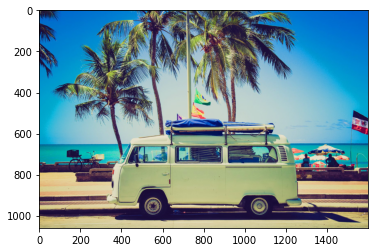

/content/drive/MyDrive/Colab Notebooks/foto/lake_and_boat.jpg: 17.72%


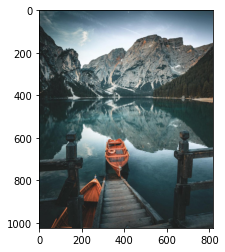

/content/drive/MyDrive/Colab Notebooks/foto/2860836263.jpg: 9.79%


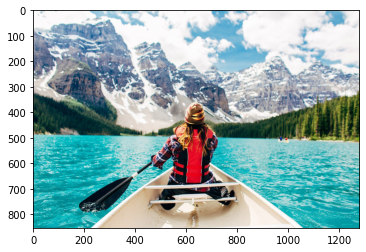

/content/drive/MyDrive/Colab Notebooks/foto/we.jpg: 7.87%


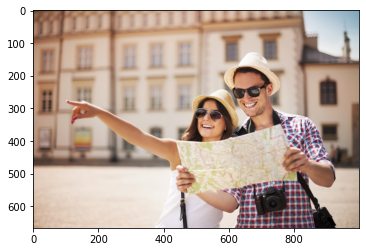

In [ ]:
import clip
import torch


# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)


# Prepare the inputs

name_image = []

for image in os.listdir(IMAGES_PATH):
  name_image.append(os.path.join(IMAGES_PATH,image))

photos = [Image.open(photo_file) for photo_file in name_image]
    
photos_preprocessed = torch.stack([preprocess(photo) for photo in photos]).to(device)

print('='*60)
user_input = input("Shortly describe the photo you would like to find: ")
print('='*60)
text_inputs = clip.tokenize(user_input).to(device)

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(photos_preprocessed)
    text_features = model.encode_text(text_inputs)

# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * text_features @ image_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(4)

#вывод по названию фото
for image, label in images_labels_dict.items():
      if user_input in label:
        print(f"All pictures with {user_input}")
        image = Image.open(image)
        plt.imshow(image)
        plt.show()
print('='*60)


# Print the result
print("\nTop predictions for %s:\n"%(user_input))
for value, index in zip(values, indices):
    #print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")
    print(f"{name_image[index]:>16s}: {100 * value.item():.2f}%")
    image = Image.open(name_image[index])
    plt.imshow(image)
    plt.show()

